In [2]:
import numpy as np
import pandas as pd
import missingno as msn

In [3]:
df = pd.read_csv('Online Retail Shipping.csv')

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<Axes: >

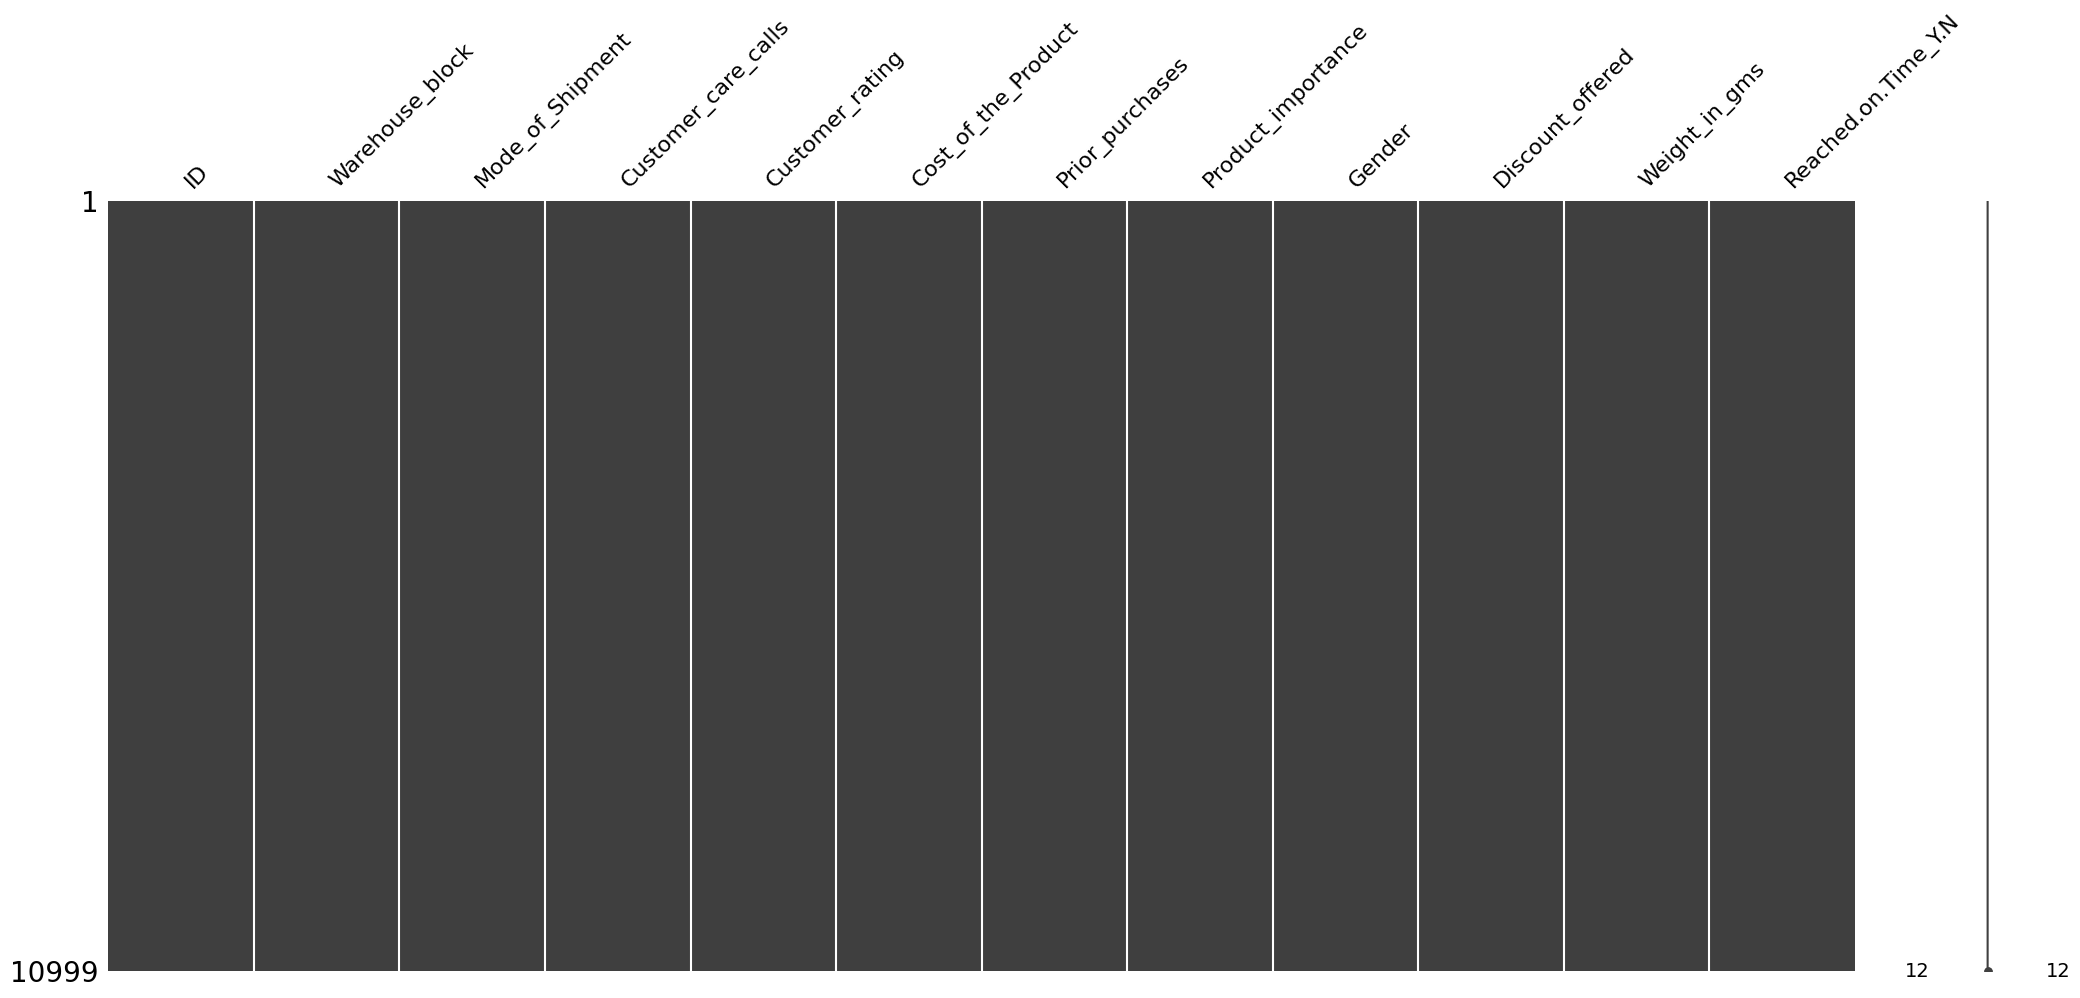

In [5]:
msn.matrix(df)

In [6]:
# Cek data type, null value, unique value for each variable
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,n_unique,sample_unique
0,ID,int64,0.0,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Warehouse_block,object,0.0,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,object,0.0,3,"[Flight, Ship, Road]"
3,Customer_care_calls,int64,0.0,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,int64,0.0,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,int64,0.0,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ..."
6,Prior_purchases,int64,0.0,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,object,0.0,3,"[low, medium, high]"
8,Gender,object,0.0,2,"[F, M]"
9,Discount_offered,int64,0.0,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43,..."


In [9]:
df.shape

(10999, 12)

In [10]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [19]:
df['Discount_offered'].unique()

array([44, 59, 48, 10, 46, 12,  3, 11, 29, 32,  1, 43, 45,  6, 36, 18, 38,
       51,  2, 28, 24, 31, 61, 22,  4, 62, 16, 56, 15,  9, 40, 37, 41, 17,
       64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57,  7, 35,  8,  5, 53, 55,
       47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30],
      dtype=int64)

In [23]:
df[['Discount_offered', 'Customer_rating']].corr()

,Discount_offered,Customer_rating
Discount_offered,1.000000,-0.003124
Customer_rating,-0.003124,1.000000


In [36]:
pd.pivot_table(data=df, index='Gender', columns='Discount_offered', values='Customer_rating', aggfunc='mean')

Discount_offered,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
Gender,,,,,,,,,,,,,,,,,,,,,
F,3.041262,3.078014,2.905437,2.922353,2.945026,3.018648,2.971963,2.952020,2.962353,2.993213,...,2.800000,2.863636,2.73913,3.227273,2.862069,2.896552,3.600000,2.517241,2.363636,2.473684
M,2.944175,3.027586,3.016787,2.907500,3.039720,3.045238,3.033981,3.069136,2.980952,2.928230,...,3.041667,2.863636,2.50000,3.214286,3.208333,2.750000,2.666667,3.041667,2.809524,3.529412
